In [3]:
import rioxarray
import os
import random
import matplotlib.pyplot as plt

In [21]:
def plot_random_predictions(num_plots=5, source_dir = '/home/workdir/solar_test_output'):
    pred_dir = os.path.join(source_dir, 'hardened_prob')
    fig, axes = plt.subplots(num_plots, 3, figsize=(15, (5*num_plots)))
    tif_files = [file for file in os.listdir(pred_dir) if file.endswith('.tif')]
    for i in range(num_plots):
        tif = tif_files[i]
        exampleimg = rioxarray.open_rasterio('/home/data/solar/images/'+tif[9:])
        examplelbl = rioxarray.open_rasterio('/home/data/solar/labels/'+tif[9:])
        predictedlbl = rioxarray.open_rasterio(os.path.join(pred_dir, tif))
        row_axes = axes[i]

        # Plot images on the current row of subplots
        exampleimg.plot.imshow(ax=row_axes[0])
        row_axes[0].set_title('Example Image')

        examplelbl.plot(ax=row_axes[1], vmin=0, vmax=1)
        row_axes[1].set_title('Example Label')

        predictedlbl.plot(ax=row_axes[2], vmin=0, vmax=1)
        row_axes[2].set_title('Predicted Label')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.savefig(os.path.join(source_dir, 'predict_vis.png'))

In [19]:
def plot_random_pairs(num_plots=5, source_dir = '/home/data/solar/images'):
    fig, axes = plt.subplots(num_plots, 2, figsize=(15, (5*num_plots)))
    tif_files = [file for file in os.listdir(source_dir) if file.endswith('.tif')]
    for i in range(num_plots):
        tif = tif_files[i]
        exampleimg = rioxarray.open_rasterio('/home/data/solar/images/'+tif)
        examplelbl = rioxarray.open_rasterio('/home/data/solar/labels/'+tif)
        row_axes = axes[i]

        # Plot images on the current row of subplots
        exampleimg.plot.imshow(ax=row_axes[0])
        row_axes[0].set_title('Example Image')

        examplelbl.plot(ax=row_axes[1], vmin=0, vmax=1)
        row_axes[1].set_title('Example Label')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

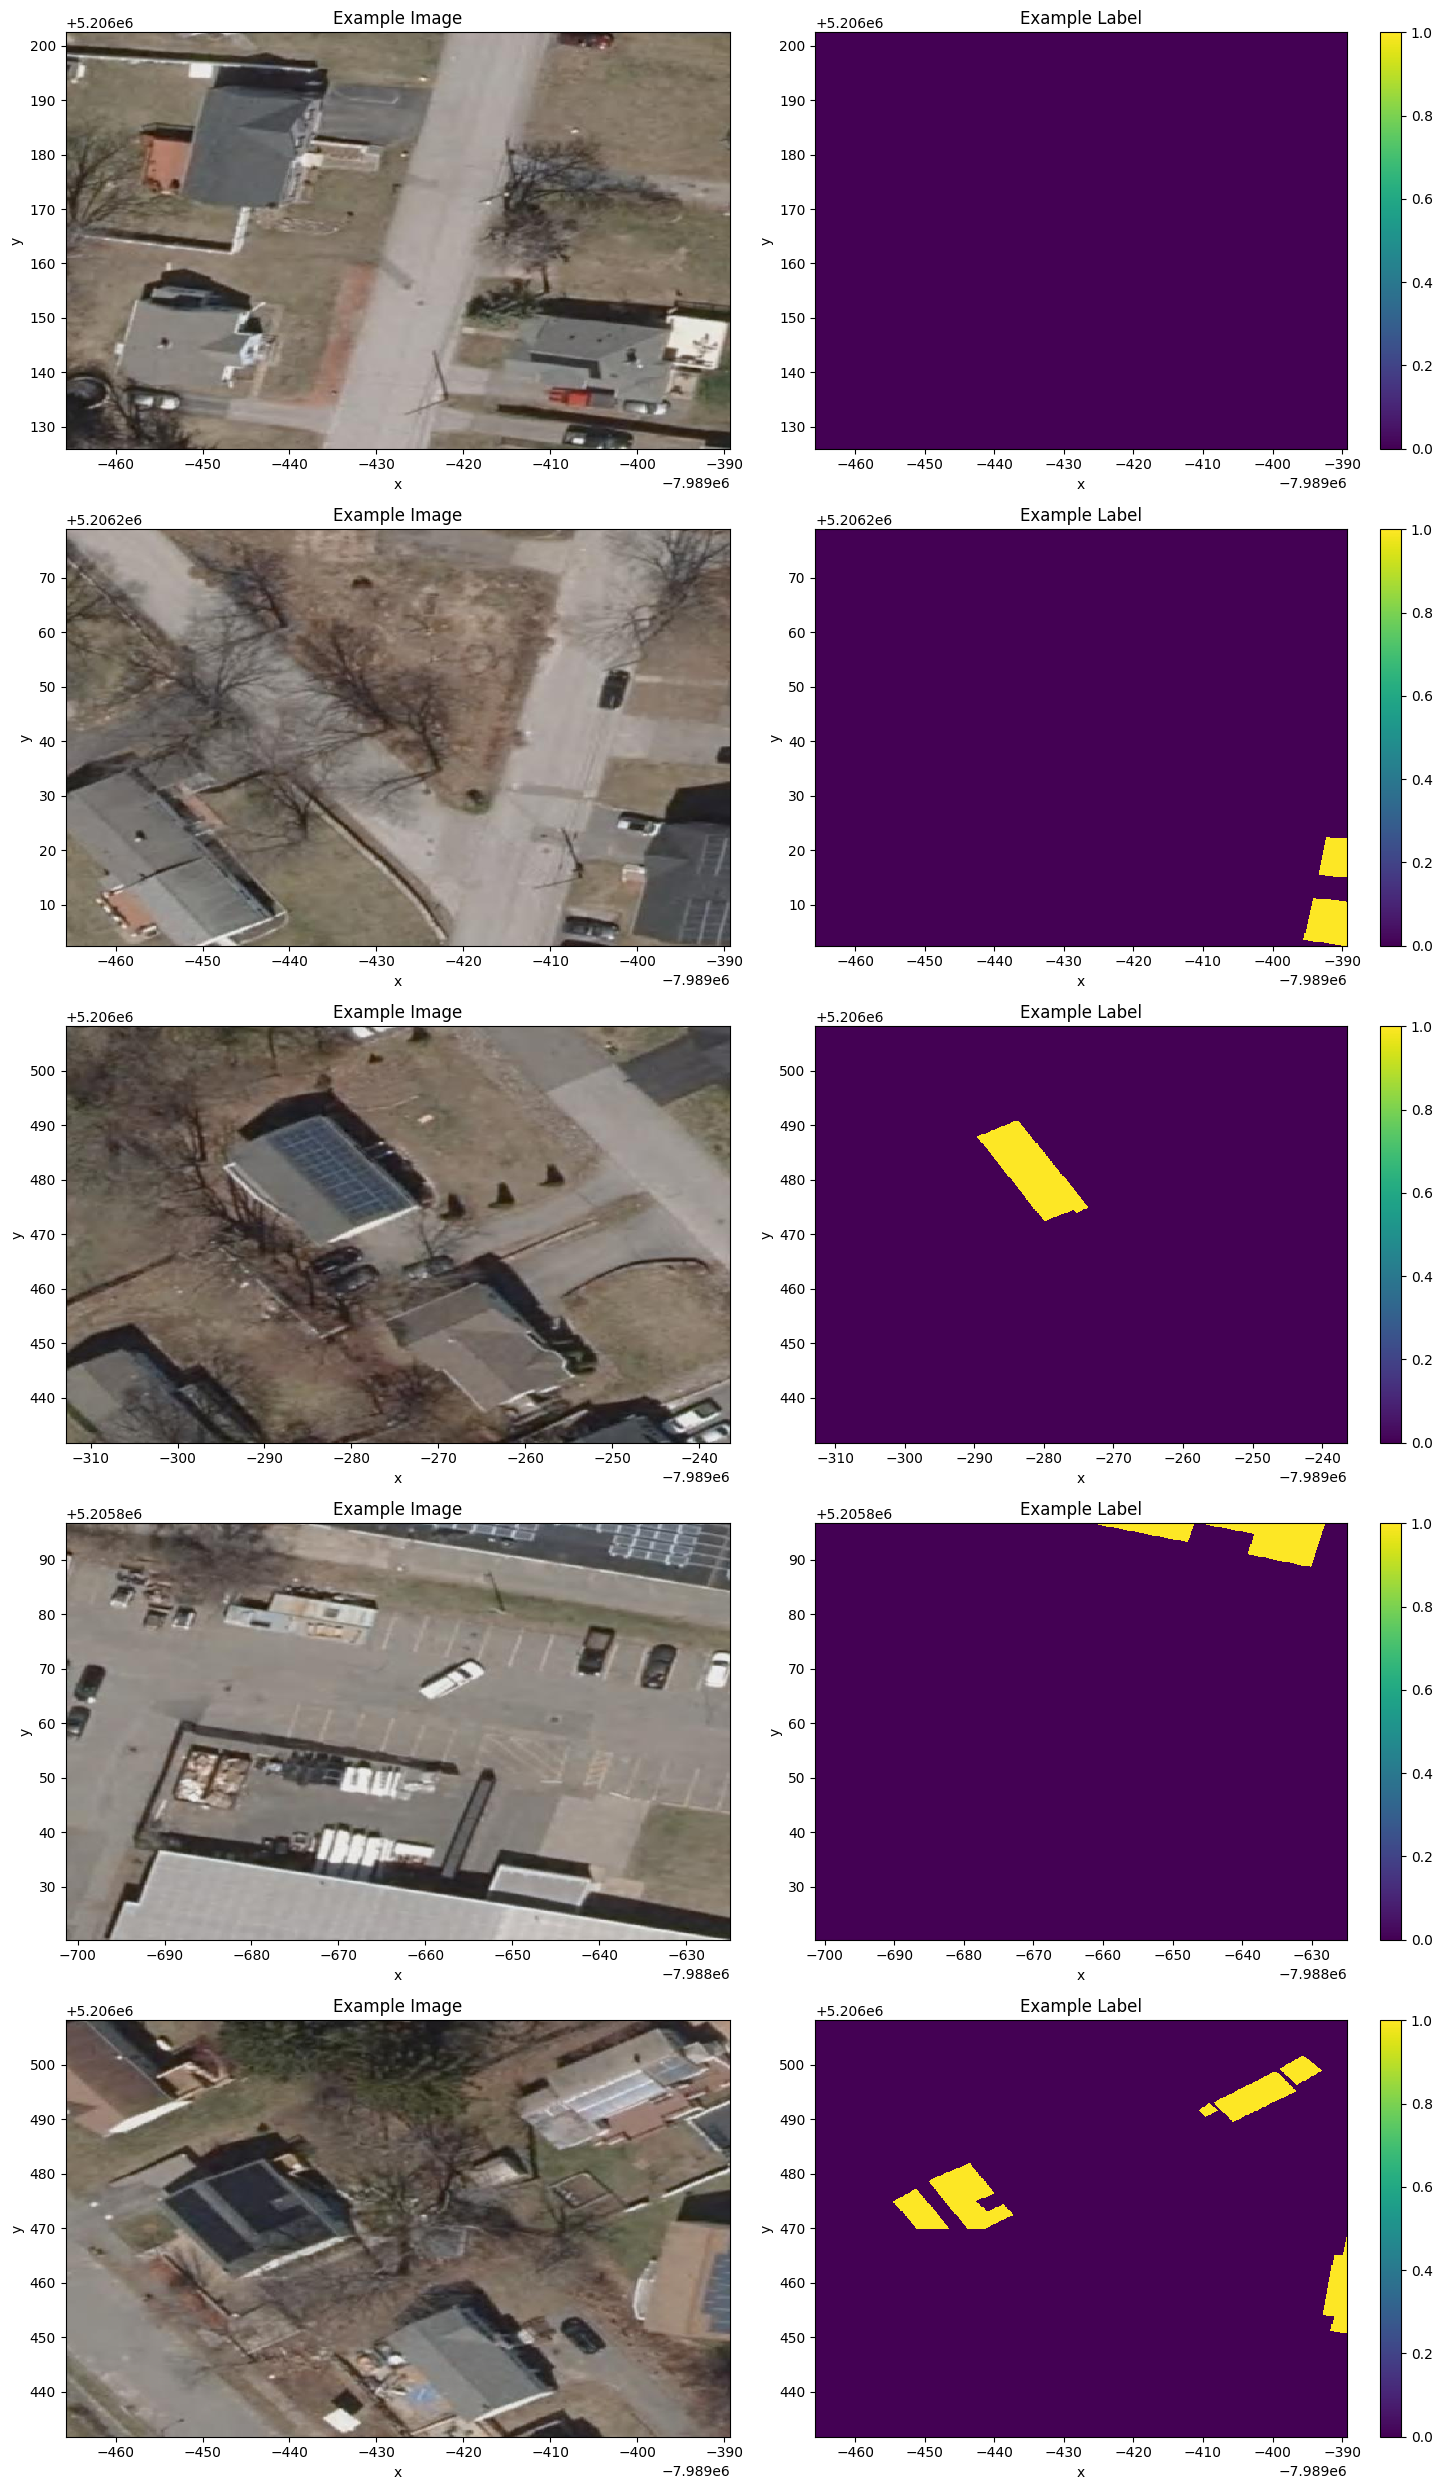

In [20]:
plot_random_pairs(num_plots=5, source_dir = '/home/data/solar/images/')

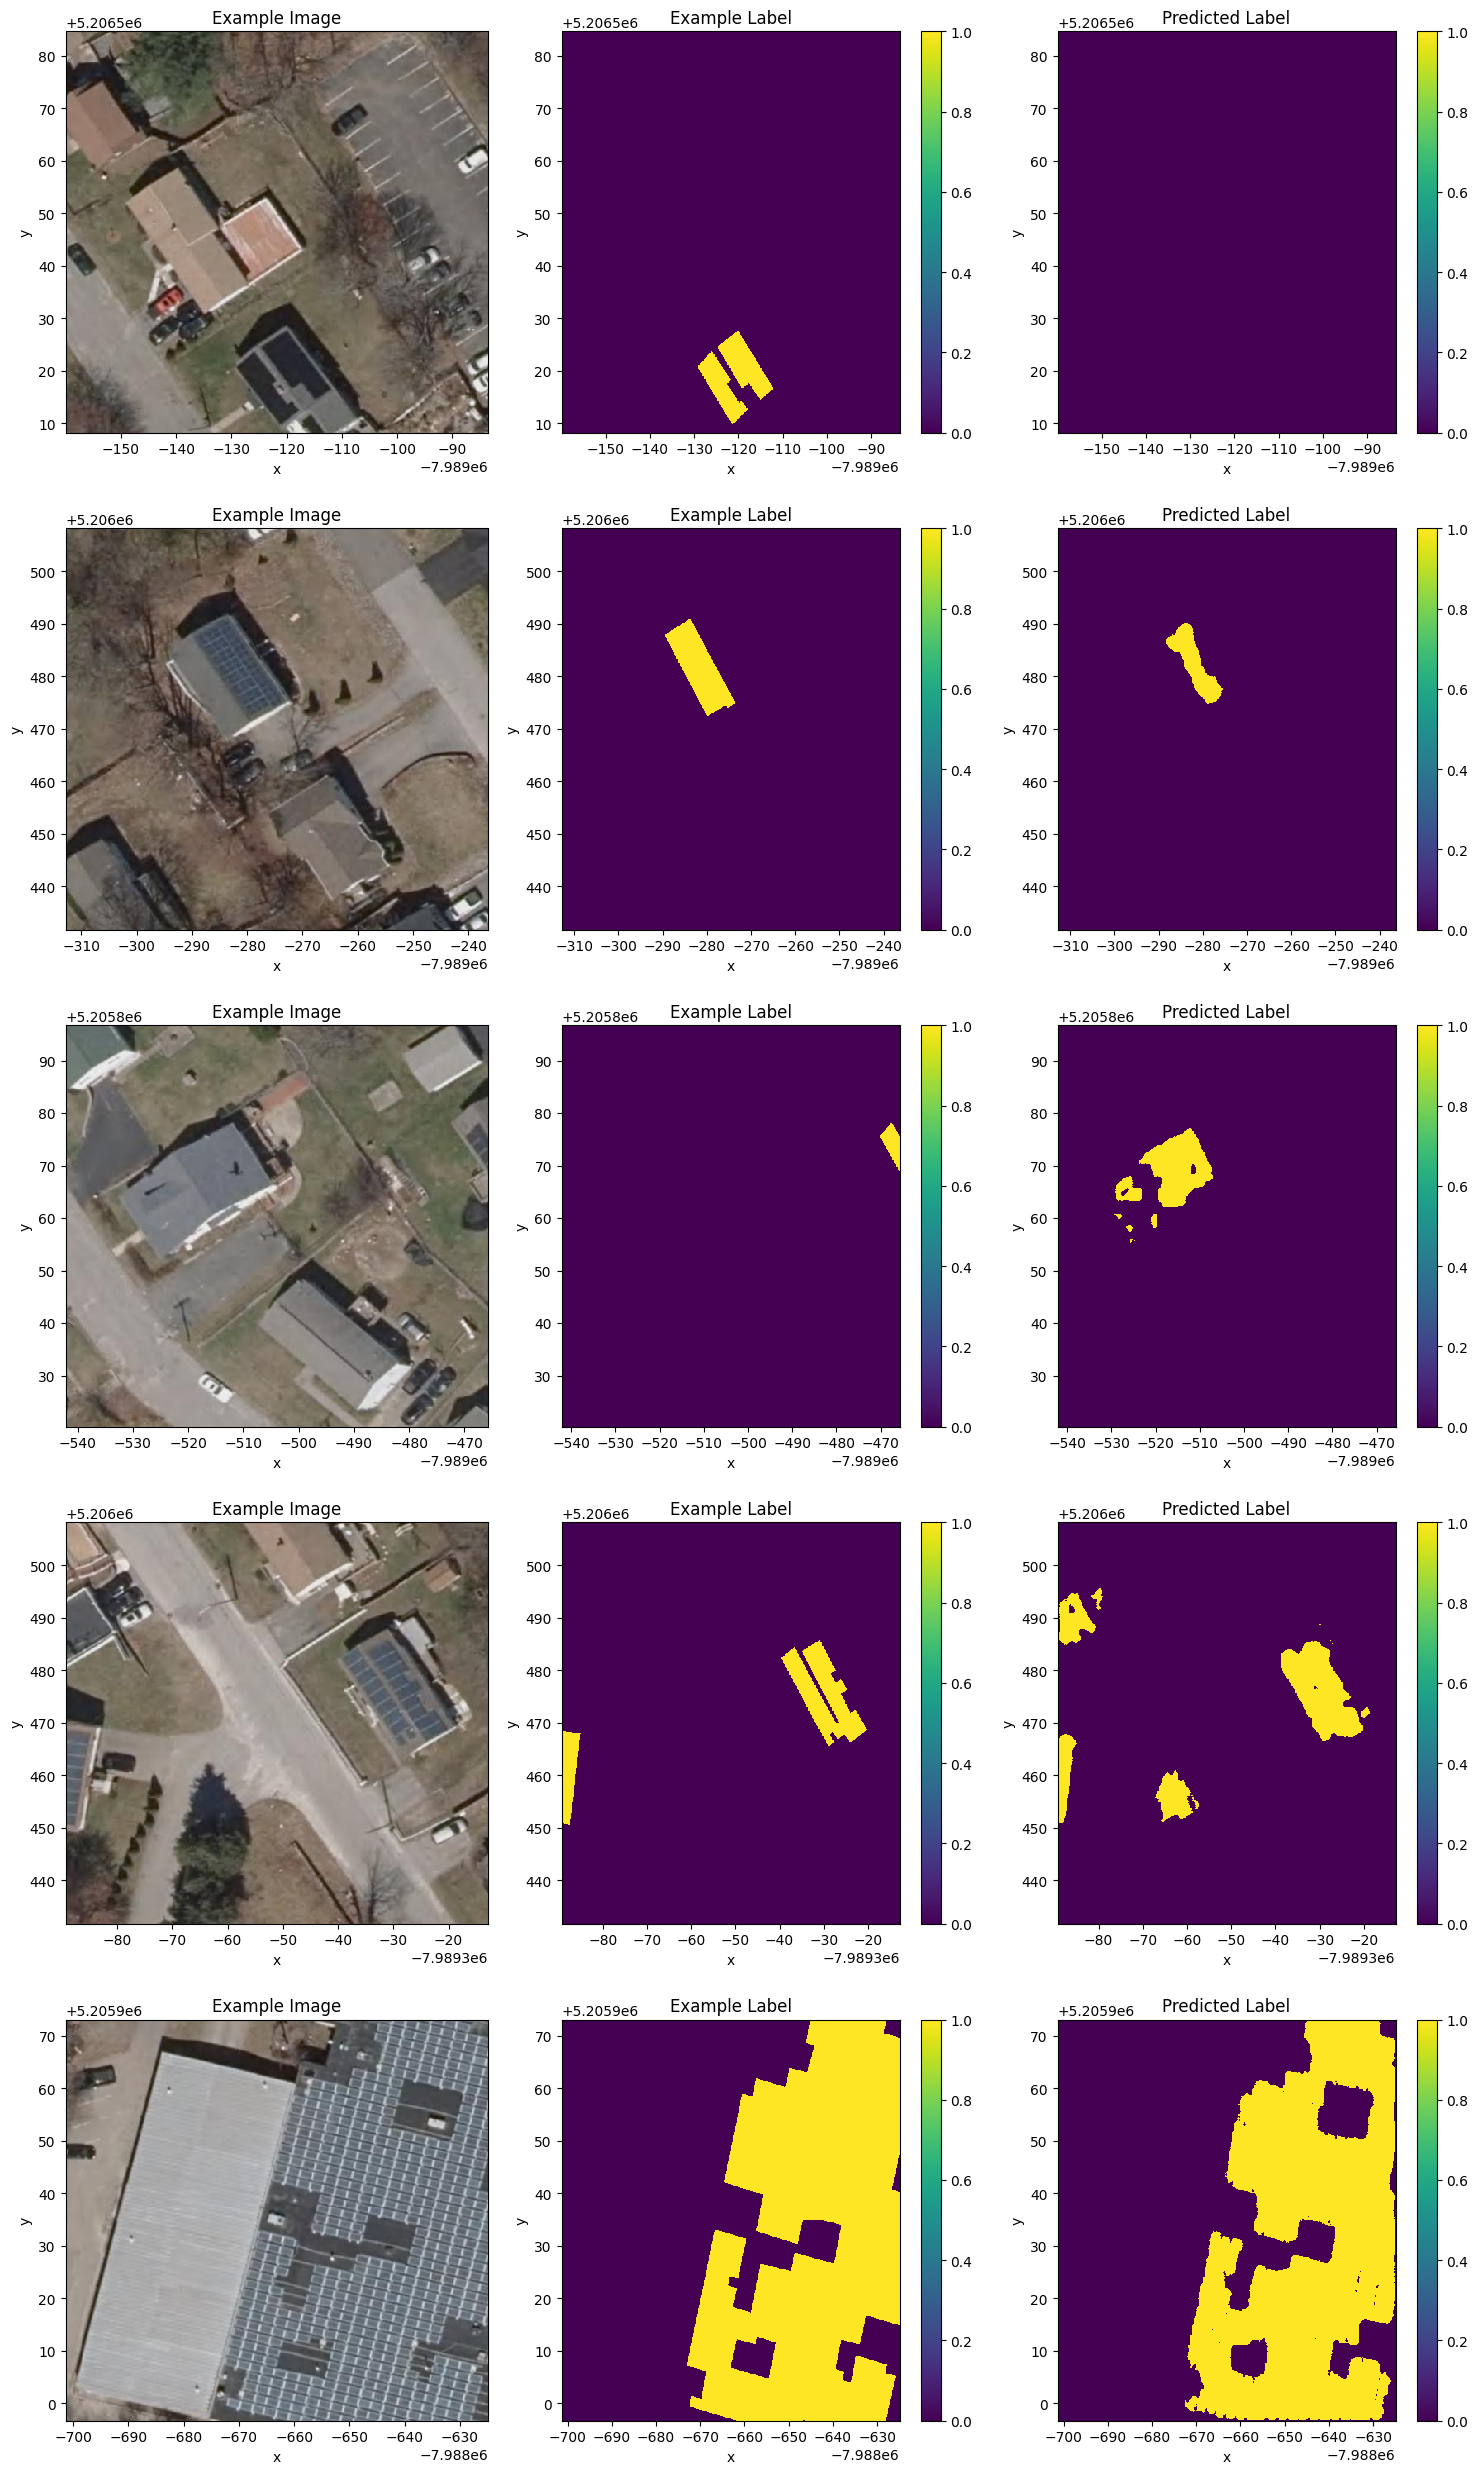

In [23]:
plot_random_predictions(num_plots=5, source_dir = '/home/workdir/solar_test_output')